In [1]:
import numpy as np
import os
import pickle
import math
import cv2

from tensorflow.keras.utils import plot_model
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras.utils import Sequence
from gensim.models.fasttext import load_facebook_model

from dev.crop import crop
from dev.preprocessing import getFrames2
from dev.preprocessing import faceMesh_2
from dev.preprocessing import handPose_2
from dev.preprocessing import points_to_displacement

In [2]:
ko_model = load_facebook_model("../ko.bin")

In [3]:
# class DataLoader_main(Sequence):
#     def __init__(self, x_set, y_set, batch_size, shuffle=False):
#         self.indices = None
#         self.x, self.y = x_set, y_set
#         self.batch_size = batch_size
#         self.shuffle = shuffle
#         self.on_epoch_end()
#
#     def __len__(self):
#         return math.ceil(len(self.x) / self.batch_size)
#
#     def __getitem__(self, idx):
#         indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
#         batch_x = []
#         batch_y = [self.y[n] for n in indices]
#         for n in indices:
#             vid = getFrames2(self.x[n])
#             tmp = points_to_displacement(faceMesh_2(vid), 128, handPose_2(vid), 21)
#             face = np.array([tmp[j]['face'] for j in range(len(tmp))])
#             hands = np.array([tmp[j]['hands']['left']+tmp[j]['hands']['right'] for j in range(len(tmp))])
#             print(face.shape, hands.shape)
#             tmp = [face, hands]
#             batch_x.append(tmp)
#         return np.array(batch_x), np.array(batch_y)
#
#     def on_epoch_end(self):
#         self.indices = np.arange(len(self.x))
#         if self.shuffle:
#             np.random.shuffle(self.indices)

In [4]:
# model = keras.models.load_model("./discriminator.h5")
# model.trainable = False

In [5]:
# train_files = []
# folder_list = os.listdir("../dataset")
# folder_list.remove("class_label.p")
# folder_list.remove("00")
# folder_list.remove("17")
# folder_list.remove("18")
# folder_list = sorted(folder_list)
# l = 100
# for i in folder_list:
#     try:
#         k = int(i)
#     except:
#         continue
#     file_list = sorted(os.listdir(f'../dataset/{i}'))
#     train_files += [*map(lambda x: f'../dataset/{i}/'+x, file_list)][:14]
# print(train_files)

In [6]:
label = ["안녕", "무엇", "고기", "비빔밥", "기쁨", "취미", "나", "영화", "얼굴", "보다", "이름", "읽다", "고맙다", "같은", "미안", "먹다", "괜찮다", "노력하다", "다음", "나이", "다시", "얼마나", "날", "나이스", "언제", "우리", "지하철", "친근하게", "버스", "타다", "핸드폰", "어디", "번호", "위치", "안내", "책임감", "누가", "도착", "가족", "시간", "소개", "받다", "부탁", "걷다", "부모", "10분", "여동생", "공부", "사람", "지금", "특별한", "어제", "교육", "시험", "끝", "너", "걱정", "결혼", "노력", "아니", "달다", "아직", "결국", "태어나다", "성공하다", "호의", "서울", "저녁", "경험", "초대", "음식", "원하다", "방문", "1시간", "멀다", "좋은", "다루다"]
print(len(label))
#12, 19, 28, 33, 35, 45, 46, 53, 73, 75
k = [*map(lambda x: label[x], [12, 17, 18, 19, 28, 33, 35, 45, 46, 53, 73, 75])]
label = [ko_model.wv[x] for x in label if x not in k for i in range(140)]
print(len(label))
print(label[0].shape)

77
9100
(200,)


In [7]:
# data = DataLoader_main(train_files, label, batch_size = 64, shuffle=True)

In [8]:
with open("../dataset/model_with_vector_X.p", 'rb') as f:
    X = pickle.load(f)

In [9]:
print(len(X))

910


In [10]:
for i in range(len(X)):
    a, b = X[i][1][:(X[i][1].shape[0]//2)], X[i][1][(X[i][1].shape[0]//2):]
    X[i][1] = np.concatenate((a, b), axis=1)
    X[i][0] = X[i][0][:100]
    X[i][1] = X[i][1][:100]

In [11]:
x_face = X[:, 0]
x_hands = X[:, 1]

In [12]:
X_face = []
for i in range(len(x_face)):
    for j in range(40, 50):
        X_face.append(x_face[i][j:j+10])

In [13]:
X_hand = []
for i in range(len(x_hands)):
    for j in range(40, 50):
        X_hand.append(x_hands[i][j:j+10])

In [14]:
X_face = np.array([*X_face])
X_hand = np.array([*X_hand])

In [15]:
print(X_face.shape)

(9100, 10, 128, 3)


In [16]:
X_face = X_face.reshape(9100, 10, 3*128)
X_hand = X_hand.reshape(9100, 10, 3*42)

In [17]:
print(X_face[2][1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [18]:
y = np.array(label)

In [37]:
input_face = keras.layers.Input(shape=(10, 3*128), dtype='float32', name='input_face')
gru_face = keras.layers.GRU(64, return_sequences=True, name='face_gru')(input_face)
rnn_face = keras.layers.SimpleRNN(32, name="face_rnn")(gru_face)
batch_normal_face_1 = keras.layers.BatchNormalization(name='batch_normal_face_1')(rnn_face)
flatten_face = keras.layers.Flatten(name='flatten_face')(batch_normal_face_1)
h_face_1 = keras.layers.Dense(64, activation='leaky_relu', name='h_face_1')(flatten_face)
batch_normal_face_2 = keras.layers.BatchNormalization(name='batch_normal_face_2')(h_face_1)
h_face_2 = keras.layers.Dense(64, activation='leaky_relu', name='h_face_2')(batch_normal_face_2)
h_face_3 = keras.layers.Dense(128, activation='leaky_relu', name='h_face_3')(h_face_2)
h_face_4 = keras.layers.Dense(256, activation='leaky_relu', name='h_face_4')(h_face_3)
out_face = keras.layers.Dense(200, activation='leaky_relu', name='output_face')(h_face_4)

In [38]:
input_hand = keras.layers.Input(shape=(10, 3*42), dtype='float32', name='input_hand')
gru_hand = keras.layers.GRU(64, return_sequences=True, name='hand_gru')(input_hand)
rnn_hand = keras.layers.SimpleRNN(32, name='hand_rnn')(gru_hand)
batch_normal_hand_1 = keras.layers.BatchNormalization(name='batch_normal_hand_1')(rnn_hand)
flatten_hand = keras.layers.Flatten(name='flatten_hand')(batch_normal_hand_1)
h_hand_1 = keras.layers.Dense(64, activation='leaky_relu', name='h_hand_1')(flatten_hand)
batch_normal_hand_2 = keras.layers.BatchNormalization(name='batch_normal_hand_2')(h_hand_1)
h_hand_2 = keras.layers.Dense(64, activation='leaky_relu', name='h_hand_2')(batch_normal_hand_2)
h_hand_3 = keras.layers.Dense(128, activation='leaky_relu', name='h_hand_3')(h_hand_2)
h_hand_4 = keras.layers.Dense(256, activation='leaky_relu', name='h_hand_4')(h_hand_3)
out_hand = keras.layers.Dense(200, activation='leaky_relu', name='output_hand')(h_hand_4)

In [39]:
out_h = keras.layers.Add(name='combine')([out_face, out_hand])
out_main = keras.layers.Dense(200, activation='linear', name="main_output")(out_h)

In [40]:
model = keras.Model(inputs=[input_face, input_hand], outputs=out_main)

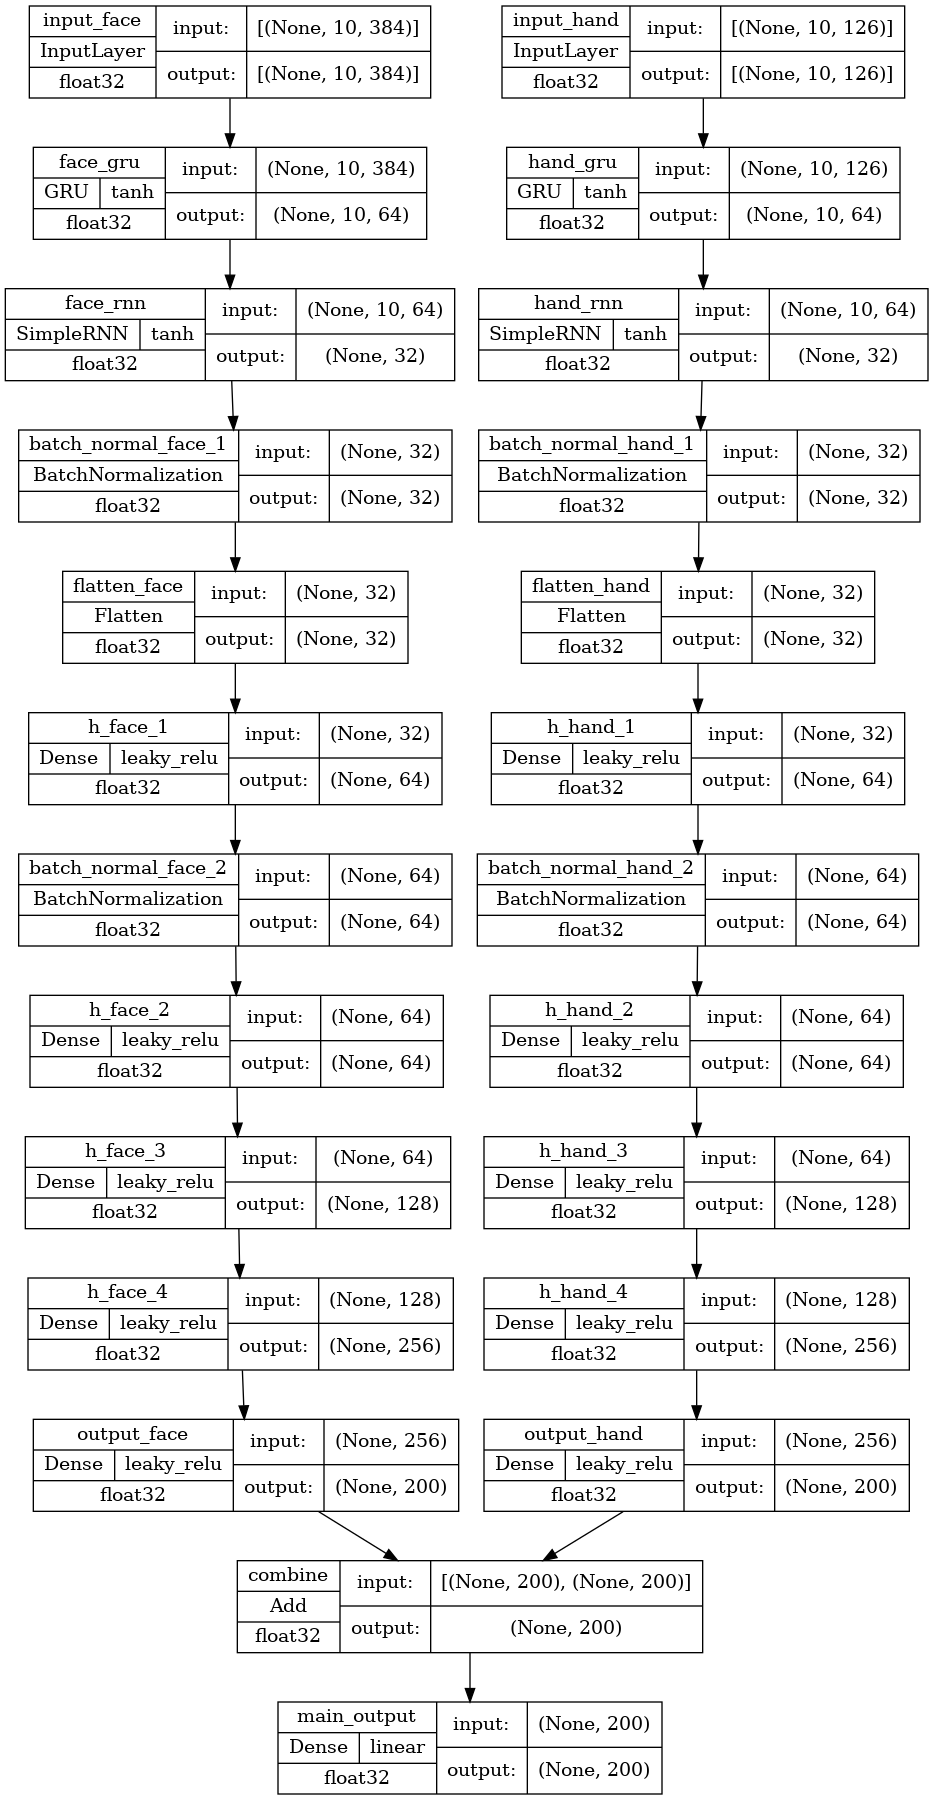

In [41]:
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

In [42]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss='mse')

In [43]:
hist = model.fit([X_face, X_hand], np.array(label), epochs=200, validation_split=0.2, batch_size=512, shuffle=True)

Epoch 1/200
15/15 [==============================] - 3s 50ms/step - loss: 0.0530 - val_loss: 0.0317
Epoch 2/200
15/15 [==============================] - 0s 11ms/step - loss: 0.0394 - val_loss: 0.0311
Epoch 3/200
15/15 [==============================] - 0s 12ms/step - loss: 0.0389 - val_loss: 0.0309
Epoch 4/200
15/15 [==============================] - 0s 11ms/step - loss: 0.0387 - val_loss: 0.0308
Epoch 5/200
15/15 [==============================] - 0s 13ms/step - loss: 0.0386 - val_loss: 0.0308
Epoch 6/200
15/15 [==============================] - 0s 11ms/step - loss: 0.0385 - val_loss: 0.0309
Epoch 7/200
15/15 [==============================] - 0s 11ms/step - loss: 0.0384 - val_loss: 0.0309
Epoch 8/200
15/15 [==============================] - 0s 25ms/step - loss: 0.0383 - val_loss: 0.0308
Epoch 9/200
15/15 [==============================] - 0s 17ms/step - loss: 0.0382 - val_loss: 0.0310
Epoch 10/200
15/15 [==============================] - 1s 38ms/step - loss: 0.0382 - val_loss: 0.0309

In [44]:
import matplotlib.pyplot as plt

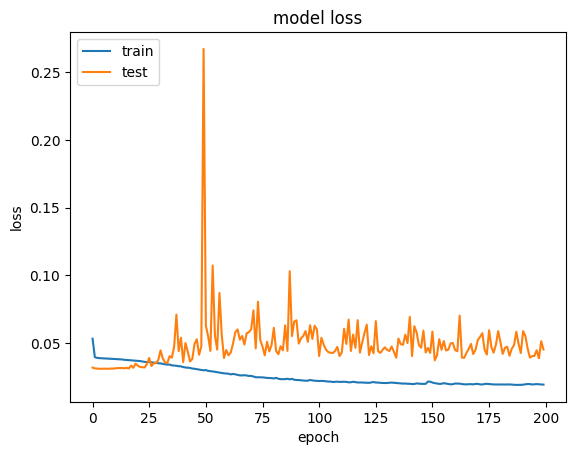

In [45]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("test3.h5")

In [43]:
test_X_file = "../dataset/05/02_05.MP4"
test_X = []
vid = getFrames2(test_X_file)
tmp = points_to_displacement(faceMesh_2(vid), 128, handPose_2(vid), 21)
face = np.array([tmp[j]['face'] for j in range(len(tmp))])
hands_l = np.array([tmp[j]['hands']['left'] for j in range(len(tmp))])
hands_r = np.array([tmp[j]['hands']['right'] for j in range(len(tmp))])
hands = np.concatenate((hands_l, hands_r), axis=1)
print(hands, face)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]] [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  .

In [44]:
for i in range(91):
    test_y = model.predict([np.array([face[i:i+10].reshape(10, 128*3)]), np.array([hands[i:i+10].reshape(10, 42*3)])])
    print(ko_model.wv.similar_by_vector(test_y[0])[0])

1/1 [==============================] - 0s 10ms/step
('비빔밥', 0.529310941696167)
1/1 [==============================] - 0s 18ms/step
('영화', 0.5799967050552368)
1/1 [==============================] - 0s 19ms/step
('취미', 0.7843465209007263)
1/1 [==============================] - 0s 16ms/step
('취미', 0.688208818435669)
1/1 [==============================] - 0s 17ms/step
('노력', 0.5718287229537964)
1/1 [==============================] - 0s 15ms/step
('노력', 0.6510961651802063)
1/1 [==============================] - 0s 15ms/step
('영화', 0.7416259050369263)
1/1 [==============================] - 0s 17ms/step
('어디', 0.8596276044845581)
1/1 [==============================] - 0s 14ms/step
('어디', 0.8881793022155762)
1/1 [==============================] - 0s 18ms/step
('잖아요', 0.5669015645980835)
1/1 [==============================] - 0s 18ms/step
('친구', 0.5901071429252625)
1/1 [==============================] - 0s 15ms/step
('친구', 0.618518054485321)
1/1 [==============================] - 0s 19ms/step
(

1/1 [==============================] - 0s 11ms/step


[('영화', 0.6423651576042175), ('안내', 0.5944066643714905), ('너', 0.5783910751342773), ('위더', 0.5739415884017944), ('제작자', 0.5565758943557739), ('네버', 0.5540608167648315), ('제작사', 0.5449941158294678), ('비디오', 0.5378017425537109), ('제작', 0.5278322100639343), ('텔레비전', 0.525836706161499)]
